Followed https://www.youtube.com/watch?v=QIUxPv5PJOY&t=215s

In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas_datareader as web
from datetime import date
from datetime import datetime, timedelta, date

In [3]:
#get stock quote
year_ago = str(date.today()-timedelta(days=365))
today = str(date.today())
ticker = 'AAPL'
source = 'yahoo'
df = web.DataReader(ticker, data_source = source, start = year_ago, end = today)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-29,136.490005,134.350006,134.800003,136.330002,64556100.0,135.555542
2021-06-30,137.410004,135.869995,136.169998,136.960007,63261400.0,136.181961
2021-07-01,137.330002,135.759995,136.600006,137.270004,52485800.0,136.490204
2021-07-02,140.000000,137.750000,137.899994,139.960007,78852600.0,139.164932
2021-07-06,143.149994,140.070007,140.070007,142.020004,108181800.0,141.213211
...,...,...,...,...,...,...
2022-06-23,138.589996,135.630005,136.820007,138.270004,72433800.0,138.270004
2022-06-24,141.910004,139.770004,139.899994,141.660004,89047400.0,141.660004
2022-06-27,143.490005,140.970001,142.699997,141.660004,70207900.0,141.660004


In [4]:
ran = df.values
ran[:,3]

array([136.33000183, 136.96000671, 137.27000427, 139.96000671,
       142.02000427, 144.57000732, 143.24000549, 145.11000061,
       144.5       , 145.63999939, 149.1499939 , 148.47999573,
       146.38999939, 142.44999695, 146.1499939 , 145.3999939 ,
       146.80000305, 148.55999756, 148.99000549, 146.77000427,
       144.97999573, 145.63999939, 145.86000061, 145.52000427,
       147.36000061, 146.94999695, 147.05999756, 146.13999939,
       146.08999634, 145.6000061 , 145.86000061, 148.88999939,
       149.1000061 , 151.11999512, 150.19000244, 146.36000061,
       146.69999695, 148.19000244, 149.71000671, 149.61999512,
       148.36000061, 147.53999329, 148.6000061 , 153.11999512,
       151.83000183, 152.50999451, 153.6499939 , 154.30000305,
       156.69000244, 155.11000061, 154.07000732, 148.97000122,
       149.55000305, 148.11999512, 149.02999878, 148.78999329,
       146.05999756, 142.94000244, 143.42999268, 145.8500061 ,
       146.83000183, 146.91999817, 145.36999512, 141.91

In [5]:
#get number of rows and columns
df.shape

(253, 6)

Text(0, 0.5, 'Price')

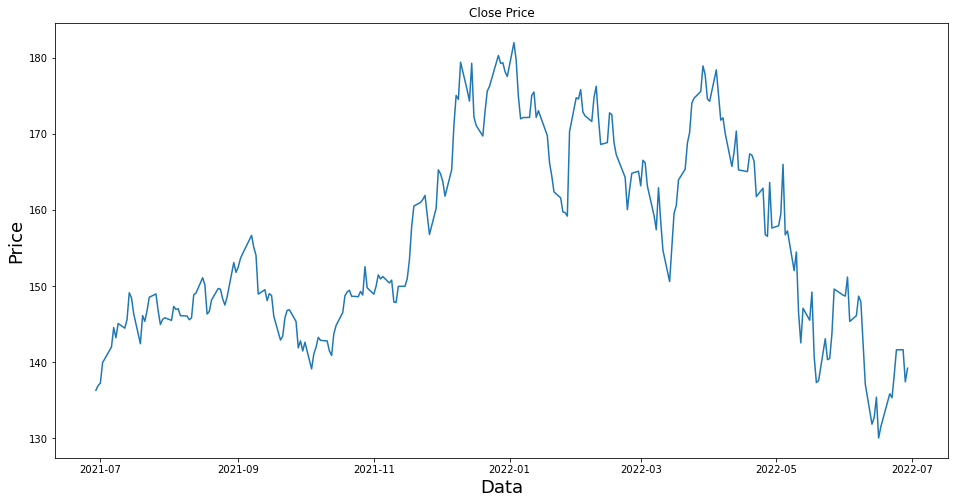

In [6]:
#visualize
plt.figure(figsize =(16,8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Price', fontsize = 18)

In [7]:
#create X and Y dataframes
X = pd.DataFrame(df.drop(columns = ['Close']))
y = pd.DataFrame(df['Close'])

In [8]:
X

,High,Low,Open,Volume,Adj Close
Date,,,,,
2021-06-29,136.490005,134.350006,134.800003,64556100.0,135.555542
2021-06-30,137.410004,135.869995,136.169998,63261400.0,136.181961
2021-07-01,137.330002,135.759995,136.600006,52485800.0,136.490204
2021-07-02,140.000000,137.750000,137.899994,78852600.0,139.164932
2021-07-06,143.149994,140.070007,140.070007,108181800.0,141.213211
...,...,...,...,...,...
2022-06-23,138.589996,135.630005,136.820007,72433800.0,138.270004
2022-06-24,141.910004,139.770004,139.899994,89047400.0,141.660004
2022-06-27,143.490005,140.970001,142.699997,70207900.0,141.660004


In [9]:
import math
#create new dataframe with only close

#convert dataframe in numpy array
X = X.values
y = y.values
#get number of rows to train our model on
training_data_len = math.ceil(X.shape[0]*.8)

In [10]:
training_data_len


203

In [11]:
#scale data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(X)
scaled_y = scaler.fit_transform(y)
scaled_data

array([[0.08110793, 0.1060306 , 0.08999231, 0.15253311, 0.10680976],
       [0.09930769, 0.13638182, 0.11605767, 0.14414952, 0.11898466],
       [0.09772507, 0.13418532, 0.12423895, 0.07437414, 0.12497557],
       ...,
       [0.21958468, 0.238219  , 0.24029662, 0.18913028, 0.22545426],
       [0.21819976, 0.16533574, 0.22945202, 0.16889817, 0.14343557],
       [0.16379819, 0.15235632, 0.14060121, 0.1634525 , 0.17822535]])

In [12]:
scaled_data.shape

(253, 5)

In [13]:
scaled_y.shape

(253, 1)

In [14]:
#create the training dataset

#create scaled data
X = scaled_data[0:training_data_len, :]
Y = scaled_y[0:training_data_len, :]
#split data into X_train and y_train
X_train = []
y_train = []
for i in range(60, len(X)):
    X_train.append(X[i-60:i, :].ravel())
    y_train.append(Y[i, :])
    if i<=60:
        print(X_train)
        print(y_train)
        print()


[array([0.08110793, 0.1060306 , 0.08999231, 0.15253311, 0.10680976,
       0.09930769, 0.13638182, 0.11605767, 0.14414952, 0.11898466,
       0.09772507, 0.13418532, 0.12423895, 0.07437414, 0.12497557,
       0.15054402, 0.17392185, 0.14897235, 0.24510742, 0.17696079,
       0.21285843, 0.22024788, 0.19025876, 0.43502315, 0.21677053,
       0.24727991, 0.27196505, 0.25627828, 0.41384759, 0.26605019,
       0.23086048, 0.23222852, 0.21898773, 0.41814655, 0.24034747,
       0.26231442, 0.27176518, 0.24124797, 0.38133634, 0.27648602,
       0.27556888, 0.29872217, 0.30707763, 0.22857659, 0.26469726,
       0.2981208 , 0.29133409, 0.26560107, 0.38739917, 0.2867282 ,
       0.33986166, 0.37220445, 0.34303652, 0.55720582, 0.35455979,
       0.34836794, 0.36042337, 0.36472601, 0.42620701, 0.34161205,
       0.34362006, 0.3362622 , 0.34988585, 0.33834415, 0.30122194,
       0.2310585 , 0.25219657, 0.26027385, 0.52083917, 0.22508029,
       0.29099913, 0.27795553, 0.25475647, 0.35840855, 0.2965

In [15]:
y_train

[array([0.3228105]),
 array([0.32454286]),
 array([0.29470642]),
 array([0.22810408]),
 array([0.24581338]),
 array([0.2202118]),
 array([0.24234836]),
 array([0.17478349]),
 array([0.21270459]),
 array([0.22983644]),
 array([0.25466788]),
 array([0.24716068]),
 array([0.24542831]),
 array([0.22040419]),
 array([0.2088548]),
 array([0.26371507]),
 array([0.28450432]),
 array([0.31742072]),
 array([0.35996146]),
 array([0.3695861]),
 array([0.37382097]),
 array([0.35861417]),
 array([0.35765164]),
 array([0.37074131]),
 array([0.36169412]),
 array([0.43330146]),
 array([0.37998088]),
 array([0.36381155]),
 array([0.38421574]),
 array([0.41251221]),
 array([0.40231011]),
 array([0.40846973]),
 array([0.39230041]),
 array([0.39942255]),
 array([0.34379214]),
 array([0.34282962]),
 array([0.38363829]),
 array([0.38383068]),
 array([0.40307996]),
 array([0.45101077]),
 array([0.53532241]),
 array([0.58691063]),
 array([0.59595782]),
 array([0.60346502]),
 array([0.61366712]),
 array([0.5149

In [16]:
#convert x_train and Y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [17]:
X_train.shape

(143, 300)

In [18]:
#reshape x_train
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))

In [19]:
#build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False ))
model.add(Dense(25))
model.add(Dense(1))

In [20]:
#compile model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
#train model
model.fit(X_train, y_train, batch_size = 1, epochs = 1)

143/143 [==============================] - 17s 100ms/step - loss: 0.0402


In [22]:
#create testing dataset
test_data = scaled_data[training_data_len-60: , :]
#create x_test, y_test
X_test =[]
y_test = y[training_data_len:,]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i,:].ravel())

In [23]:
y_test

array([[167.3999939 ],
       [167.22999573],
       [166.41999817],
       [161.78999329],
       [162.88000488],
       [156.80000305],
       [156.57000732],
       [163.63999939],
       [157.6499939 ],
       [157.96000671],
       [159.47999573],
       [166.02000427],
       [156.77000427],
       [157.27999878],
       [152.05999756],
       [154.50999451],
       [146.5       ],
       [142.55999756],
       [147.11000061],
       [145.53999329],
       [149.24000549],
       [140.82000732],
       [137.3500061 ],
       [137.58999634],
       [143.11000061],
       [140.36000061],
       [140.52000427],
       [143.77999878],
       [149.63999939],
       [148.83999634],
       [148.71000671],
       [151.21000671],
       [145.38000488],
       [146.13999939],
       [148.71000671],
       [147.96000671],
       [142.63999939],
       [137.13000488],
       [131.88000488],
       [132.75999451],
       [135.42999268],
       [130.05999756],
       [131.55999756],
       [135

In [24]:
#convert data to a numpy array
X_test = np.array(X_test)
X_test

array([[0.67141445, 0.66413755, 0.65353867, ..., 0.64402573, 0.18146351,
        0.67573731],
       [0.59169143, 0.51238025, 0.56982493, ..., 0.66495431, 0.17304496,
        0.72095581],
       [0.60079116, 0.55870627, 0.55003786, ..., 0.7361109 , 0.17437887,
        0.71765652],
       ...,
       [0.9341246 , 0.95167735, 0.92237439, ..., 0.18702411, 0.31112193,
        0.22545426],
       [0.90286838, 0.90575078, 0.90886589, ..., 0.24029662, 0.18913028,
        0.22545426],
       [0.84055396, 0.85662954, 0.83637735, ..., 0.22945202, 0.16889817,
        0.14343557]])

In [25]:
#reshape data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_test.shape

(50, 300, 1)

In [26]:
#get models predicted price values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


2/2 [==============================] - 1s 42ms/step


In [27]:
#getting the root mean squared error
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

6.583667602539062

C:\Users\jyama\AppData\Local\Temp/ipykernel_3500/1476690831.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


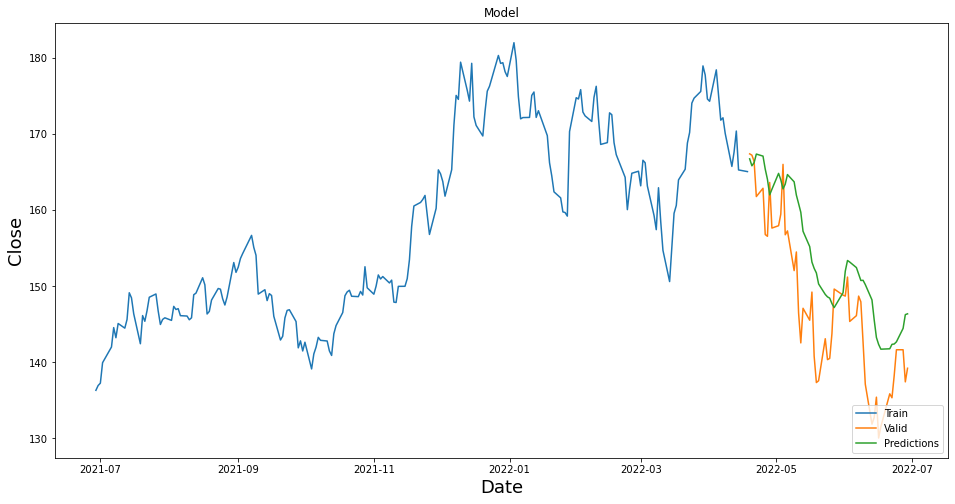

In [28]:
#plot data
data = df.filter(['Close'])
train= data[0:training_data_len]
valid = data[training_data_len :]
valid['Predictions'] = predictions

#visualize
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')

In [29]:
#show the valid acutal price vs predicted
valid

,Close,Predictions
Date,,
2022-04-19,167.399994,166.746735
2022-04-20,167.229996,165.833359
2022-04-21,166.419998,166.244614
2022-04-22,161.789993,167.373947
2022-04-25,162.880005,167.104843
2022-04-26,156.800003,165.399292
2022-04-27,156.570007,164.051254
2022-04-28,163.639999,162.015869
2022-04-29,157.649994,162.741180


In [30]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-23,138.589996,135.630005,136.820007,138.270004,72433800.0,138.270004
2022-06-24,141.910004,139.770004,139.899994,141.660004,89047400.0,141.660004
2022-06-27,143.490005,140.970001,142.699997,141.660004,70207900.0,141.660004
2022-06-28,143.419998,137.320007,142.130005,137.440002,67083400.0,137.440002
2022-06-29,140.669998,136.669998,137.460007,139.229996,66242411.0,139.229996


In [31]:
close = df['Close'].values
close.shape

(253,)

In [32]:
#predict tomorrows price
X_val = X[-60:,:].ravel()
X_v = []
X_v.append(X_val)
X_v = np.array(X_v)
X_v = np.reshape(X_v ,(X_v.shape[0],X_v.shape[1],1))
tomorrow = model.predict(X_v)
tomorrow = float(scaler.inverse_transform(tomorrow))
print(tomorrow)


1/1 [==============================] - 0s 50ms/step
166.7467498779297


In [33]:
#get percentage of change
percent = (tomorrow - close[-1:])/close[-1:]
print(percent*100)

[19.76352438]


In [34]:
random = 

SyntaxError: invalid syntax (Temp/ipykernel_3500/3155488897.py, line 1)